<a href="https://colab.research.google.com/github/Yalla-Krishnaveni/2216123_AIML_Bootcamp/blob/main/Day_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#step1
dataset="/content/drive/MyDrive/SUV_Purchase.csv"
import pandas as pd

df=pd.read_csv(dataset)#dataframe-2D

In [24]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [26]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [27]:
# EstimatedSalary : Outliers handling
X = df.drop(df.query("EstimatedSalary > 120000 and Purchased == 0").index)# Age : Outliers handling
X = df.drop(df.query("Age > 55 and Purchased == 0").index)

In [28]:
#data processing
from sklearn import preprocessing  
#labelencoding
LE=preprocessing.LabelEncoder()
#fitting it to our dataset
df.Gender=LE.fit_transform(df.Gender)

In [29]:
df.shape

(400, 5)

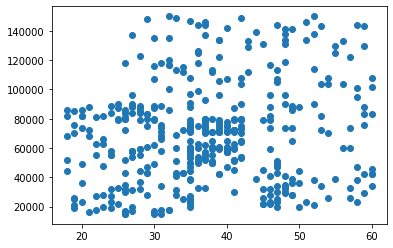

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df.Age,df.EstimatedSalary)
plt.show()

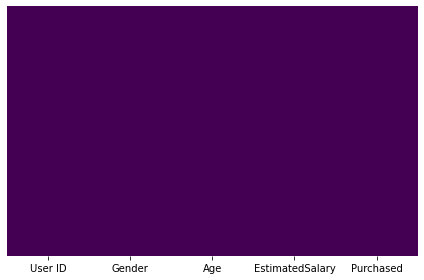

In [31]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


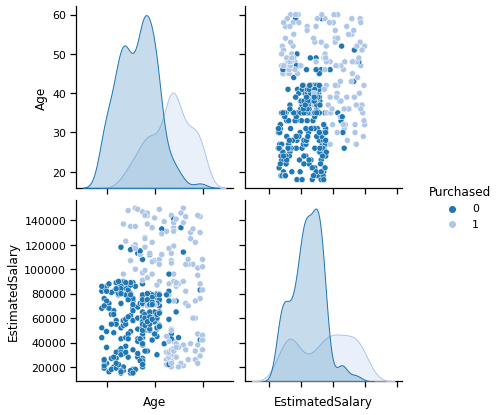

In [32]:
#Understanding the Distribution with Seaborn
import seaborn as sns
with sns.plotting_context("notebook",font_scale=1):
  g = sns.pairplot(df[['Age','EstimatedSalary','Purchased']],hue='Purchased',palette='tab20',size=3)
g.set(xticklabels=[])

In [33]:
from matplotlib.axis import YTick
#method 2 to load the data in the form of arrays -by library numpy
import numpy as np
X=np.array(df[['EstimatedSalary','Age']])
Y=np.array(df[['Purchased']])

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [36]:
X_train

array([[ 2.18,  1.94],
       [ 0.39,  2.04],
       [-0.43, -1.3 ],
       [-1.02, -1.11],
       [-0.93,  1.94],
       [ 0.3 ,  0.42],
       [ 0.15,  0.22],
       [ 1.77,  2.04],
       [-0.84,  0.8 ],
       [-0.29,  0.32],
       [-0.17,  0.42],
       [ 2.24, -0.06],
       [-0.64, -1.4 ],
       [-1.08, -1.21],
       [ 0.42, -1.3 ],
       [ 0.77, -1.02],
       [-0.2 , -1.4 ],
       [-1.08,  0.99],
       [ 0.59,  0.99],
       [ 1.01,  0.42],
       [-0.9 ,  0.61],
       [ 1.48, -0.54],
       [-0.58,  0.03],
       [ 1.92, -0.54],
       [-1.43,  1.37],
       [ 1.01,  1.47],
       [-0.81,  0.13],
       [-0.26,  0.03],
       [-0.58, -0.16],
       [-0.2 , -0.16],
       [-1.31, -0.25],
       [-0.58, -0.25],
       [ 0.1 ,  0.42],
       [-0.61,  0.89],
       [-1.2 ,  2.04],
       [-0.14,  1.08],
       [ 1.8 ,  0.7 ],
       [ 0.57, -0.64],
       [ 0.36,  0.8 ],
       [-0.55,  0.89],
       [-1.61, -1.11],
       [ 0.95,  2.13],
       [ 1.24,  0.03],
       [ 1.

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [38]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

In [40]:
print("Predicted value for training data:",model.score(X_train,Y_train)*100)

Predicted value for training data: 82.1875


In [41]:

print("Predicted value for testing data:",model.score(X_test,Y_test)*100)

Predicted value for testing data: 92.5


In [42]:
accuracy=model.score(X,Y)*100
print(accuracy)

84.25


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred) 
print(cm) 
accuracy_score(Y_test, y_pred)

[[57  1]
 [ 5 17]]


0.925

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
from matplotlib.colors import ListedColormap
X_set, Y_set = sc.inverse_transform(X_train), Y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25), np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25)) 
plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)): 
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j) 
  plt.title('Logistic Regression (Training set)')
  plt.xlabel('Age') 
  plt.ylabel('Estimated Salary') 
  plt.legend() 
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NotFittedError: ignored